<div style="width:90%; text-align:center; border-width: 0px; display:block; margin-left:auto; margin-right:auto;">
<div class="alert alert-block alert-success" style="text-align:center; color:navy;">
<img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/logo_unb.png" style="width: 200px; opacity:0.85;">
<h1>Universidade de Brasília</h1>
<h2>Instituto de Física</h2>
<hr style="width:44%;border:1px solid navy;">
<h3>Métodos Computacionais A (MCA)</h3> 
<h4>Prof. Bernhard Enders</h4>
<hr style="width:44%;border:1px solid navy;">
</div>
</div>

# **➲ Aula 13 - Autovalores e Autovetores**

## ➥ O problema de autovalores e autovetores
---

Em álgebra linear, um escalar λ diz-se um **valor próprio,** **autovalor** ou **valor característico** de um operador linear se existir um vetor  ***x*** diferente de zero tal que: 

$$
A\mathbf {x} = \lambda\mathbf{x}.
$$ 

O vetor ***x*** é chamado **vetor próprio**, **autovetor** ou **vetor característico**. Os autovalores de uma dada matriz quadrada A de dimensão $n\times n$ são os $n$ números que resumem as propriedades essenciais daquela matriz. O autovalor de A é um número λ tal que, se for subtraído de cada entrada na diagonal de A, converte A numa matriz singular (ou não-invertível). Subtrair um escalar λ de cada entrada na diagonal de A é o mesmo que subtrair λ vezes a matriz identidade $\mathbb{I}$ de A. Portanto, λ é um autovalor se, e somente se, a matriz $(A - \lambda\mathbb{I})$ for singular (determinante nulo). Desse modo temos que os autovalores podem ser determinados via: 

$$
\det{(A - \lambda\mathbb{I})} = 0,
$$
que é chamada de **equação característica** de A. Após obter os autovalores, os autovetores podem ser obtidos através da resolução do sistema linear homogêneo:

$$
(A - \lambda\mathbb{I})\mathbf{x} = 0.
$$


## ➥ Exemplo de Aplicação: Poços Quânticos
---

Um poço de potencial representa a energia potencial em forma de poço envolvida num certo sistema e pode ser qualificado como finito ou infinito. Um poço de potencial é a região em torno de um mínimo local de energia potencial que, por sua vez, é a forma de energia que está associada a um certo sistema, no qual ocorre interações entre diferentes corpos, e está relacionada com a posição que determinado corpo ocupa.

Sob uma perspectiva quântica, o poço de potencial representa o confinamento quântico da partícula em questão e pode provocar a quantização da energia da mesma, o que, classicamente, não acontece.

No contexto de sistemas nanoestruturados, são denominados genericamente poços quânticos os sistemas estruturados em camadas, que resultam em um sistema tridimensional com um potencial que varia apenas ao longo de uma das direções. Através da solução da equação de Schrödinger percebe-se que as energias resultantes descrevem uma partícula livre em duas dimensões enquanto que confinada, e, portanto, com energias quantizadas, em uma direção, por exemplo, a direção $x$, como mostrada no potencial da figura abaixo.

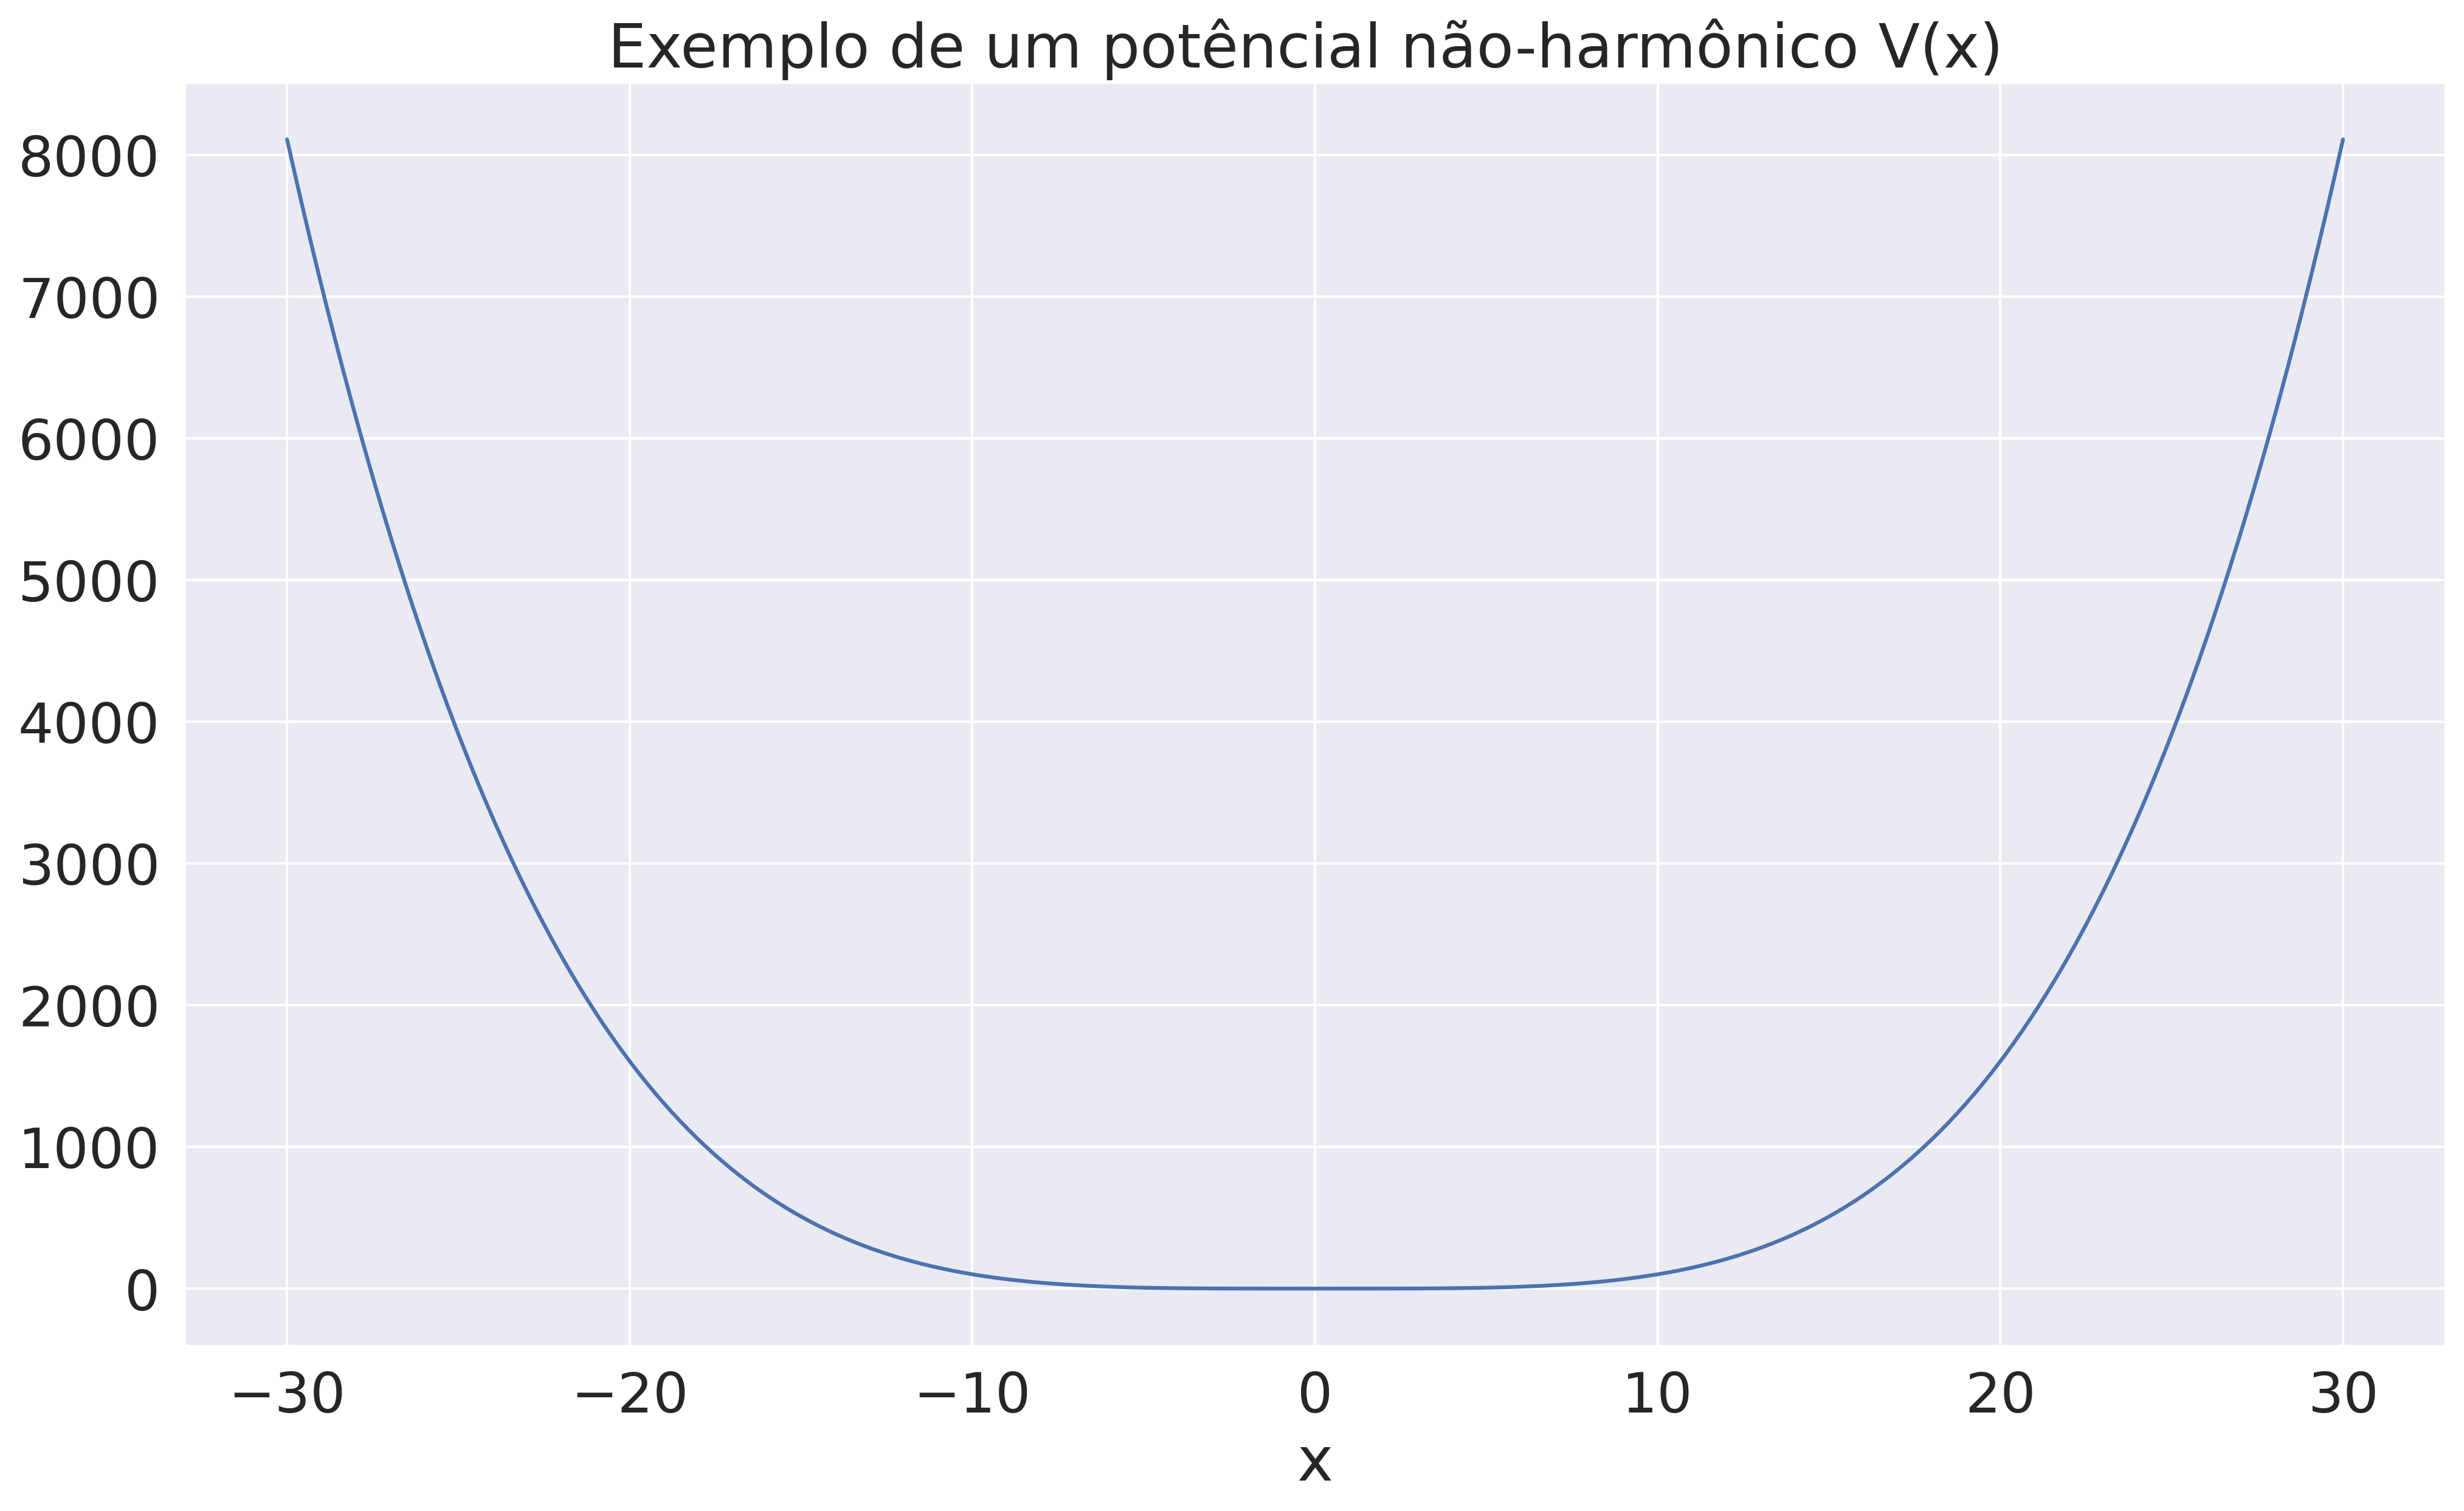

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
sns.set(font="Verdana")
sns.set(font_scale=2)

# um potencial não-harmônico
def potencial(x):
    a = 1e-2
    b = 1e-2 
    return a*x**2 + b*x**4

x = np.linspace(-30, 30, 256+1)
y = potencial(x)

fig, ax = plt.subplots(figsize=(16, 9), dpi=300)
ax.plot(x, y)
ax.set(title='Exemplo de um potêncial não-harmônico V(x) ')
plt.xlabel('x')
plt.show()

## A Equação de Schrödinger 

A equação de Schrödinger unidimensional independente do tempo para uma partícula de massa $m$ se movendo num potencial $V(x)$ é dada por:
\begin{equation*}
-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} + V(x)\psi(x)=E\psi(x),
\end{equation*}

onde $\hbar=\frac{h}{2\pi}$ é a constante reduzida de Plank. Esta é uma equação de autovalor, na qual $\psi$ representa as autofunções e $E$ representa os autovalores de energia. As seguintes condições de contorno são tipicamente impostas a esta equação:

\begin{equation*}
\psi(-\infty) = 0 \quad\text{e}\quad \psi(\infty) = 0.
\end{equation*}

O primeiro passo na resolução do problema é impor uma malha no domínio de solução e obter a equação de diferenças finitas apropriada. Iremos então procurar a solução da equação de diferenças nos pontos da malha. Visto que estamos substituindo uma equação diferencial contínua por uma equação de diferenças finitas discreta, devemos procurar a solução em uma malha finita. Esperamos, é claro, que a solução desse problema seja (aproximadamente) a solução do problema original. Nesse exemplo iremos tomar a malha associada a um certo espaçamento $\Delta x$ e obter soluções para os pontos interiores — as soluções para $x=-\infty$ e $x=\infty$ estão fixadas pelas condições de contorno e, portanto, não estão sujeitas à alterações. Substituindo os operadores diferenciais na equação de Schrödinger original pelas aproximações dadas pelas aproximações de diferenças finitas, obtemos a seguinte equação de diferenças:

\begin{equation*}
-\frac{{\hbar^2}}{{2m}}\left[{\frac{{\psi _{i + 1} - 2\psi _i +
\psi_{i - 1}}}{{(\Delta x)^2}}}\right] + V_i\psi _i = E_j\psi _i,\quad
i=1, 2, \ldots, n-1,
\end{equation*}

onde $\Delta x=x_i-x_{i-1}$ é o passo da malha e $n$ é quantidade de subintervalos da malha (contendo $n+1$ pontos). As equações anteriores formam um sistema linear com $n-1$ equações a $n-1$ incógnitas $\psi_1, \ldots, \psi_{n-1}$. Tal sistema pode ainda ser escrito na forma

\begin{equation*}
-\frac{\hbar^2}{2m}\psi _{i - 1} +
\left[{\frac{{\hbar^2}}{{m}} + (\Delta x)^2V_i}\right]\psi _i -
\frac{{\hbar^2}}{{2m}}\psi _{i + 1} = (\Delta x)^2E_j\psi _i,
\end{equation*}

que, por sua vez, pode ser escrito na forma matricial $\mathbf{A}\mathbf{\psi}=\lambda\mathbf{\psi}$, ou seja:

\begin{equation*}
\begin{bmatrix}
{d_1 } & e_1 & 0 &  \cdots  & 0  \\
e_1 & {d_2 } & e_2 &  \cdots  & 0  \\
\vdots &  \vdots  & \vdots & \vdots & \vdots \\
0 &  \cdots  & e_{n - 2} & {d_{n - 1} } & e_{n - 1}  \\
0 &  \cdots  & 0 & e_{n - 1} & {d_{n} }  \\
\end{bmatrix}
\begin{bmatrix}
{\psi _1 }  \\
{\psi _2 }  \\
\vdots   \\
{\psi _{n - 2} }  \\
{\psi _{n - 1} }  \\
\end{bmatrix}
=(\Delta x)^2 E_j
\begin{bmatrix}
{\psi _1 - e_0}  \\
{\psi _2 }  \\
\vdots   \\
{\psi _{n - 2} }  \\
{\psi _{n - 1} - e_n}  \\
\end{bmatrix},
\end{equation*}

onde os elementos da diagonal principal e os elementos não-nulos fora da diagonal principal são dados, respectivamente, por

\begin{align*}
d_i &= \frac{\hbar^2}{m}+(\Delta x)^2V_i\\
\quad\text{e}\quad\\
e_i &= -\frac{\hbar^2}{2m}=\text{constante},
\end{align*}

As condições de contorno impostas garantem que: 
\begin{align*}
e_0 &= -\frac{\hbar^2}{2m}\psi_0 = 0,\\
e_n &= -\frac{\hbar^2}{2m}\psi_n = 0.
\end{align*}

Os autovalores são dados por $\lambda = (\Delta x)^2E_j$. A matriz obtida com esse exemplo é dita esparsa por possuir muitos elementos nulos e também pode ser classificada ainda como **real, tridiagonal e simétrica**.

Para obter os autovalores e autovetores da matriz $\mathbf{A}$ devemos resolver o sistema de equações lineares representado pela equação matricial acima. Existem duas classes de métodos numéricos que podem ser utilizados para este fim, numa classe encontram-se os métodos diretos, na outra os indiretos ou iterativos. Com os métodos diretos, a solução é computada pela execução de um número finito de operações aritméticas, muitas vezes esse número de operações é conhecido _a priori_. Já com os métodos iterativos, partindo de uma tentativa inicial de solução, uma seqüência de aproximações é gerada com o propósito de convergir para a solução do problema.

Métodos iterativos não são, em geral, superiores aos métodos diretos quando aplicados a equações diferenciais ordinárias. Entretanto, em muitas situações físicas de interesse o problema se torna multidimensional e requer a solução de equações diferenciais parciais, resultando em uma matriz de ordem muito elevada. Nessas circunstâncias o mérito relativo é invertido, tornando os métodos iterativos superiores aos métodos diretos, já que, nos métodos diretos, o erro tende a se propagar a cada operação aritmética. No método direto de eliminação Gaussiana, por exemplo, o processo de retrosubstituição propaga qualquer erro que possa existir em uma componente para todas as demais componentes. Em contrapartida, os métodos iterativos consideram igualmente todas as componentes e distribuem o erro de forma uniforme.

Os métodos diretos mais conhecidos são: eliminação Gaussiana, eliminação de Gauss-Jordan, decomposição LU, decomposição QR, decomposição de Cholesky, decomposição em valor singular e algoritmo de Thomas. Como métodos iterativos podemos citar: método de Jacobi, método de Gauss-Seidel, SOR e CGM, para citar apenas alguns.


In [44]:
import math
import numpy as np
import scipy as sp

# parâmetros físicos
m = 9.1093826e-31       # massa de repouso do elétron [kg]
hbar = 1.054571817e-34  # constante reduzida de Planck [J s]
hbar2 = hbar**2         # 7.6199682*m
angs = 1.0e-10          # Angstrom [m]
eV = 1.60217653e-19     # elétron-Volt [J]
Lw = 35 * angs          # largura do poço quântico [Å]
deltax = angs*2**(-3)   # passo da malha
lend = -2 * Lw          # -inf
rend = 2 * Lw           # +inf

In [45]:
# constrói a malha
xi = np.arange(lend, rend, deltax)

# altura do potencial
V0 = potencial(-Lw / 2)
# V0 = 200*1e-3*eV

# potencial discretizado
#Vi = np.where((xi > -0.5 * Lw) & (xi < 0.5 * Lw), potencial(xi), V0)
Vi = np.where((xi > -0.5 * Lw) & (xi < 0.5 * Lw), 0.0, V0)

# diagonal principal
di = hbar2 / m + deltax * deltax * Vi

# elementos fora da diagonal principal
ei = np.full(len(di) - 1, -hbar2 / (2 * m))

# resolve o problema de autovalor/autovetor
w, v = sp.linalg.eigh_tridiagonal(di, ei)

# converte para eV
w = w / deltax**2 / eV
Vi = Vi / eV
V0 = V0 / eV

/tmp/ipykernel_983/1920011007.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab10", 10)


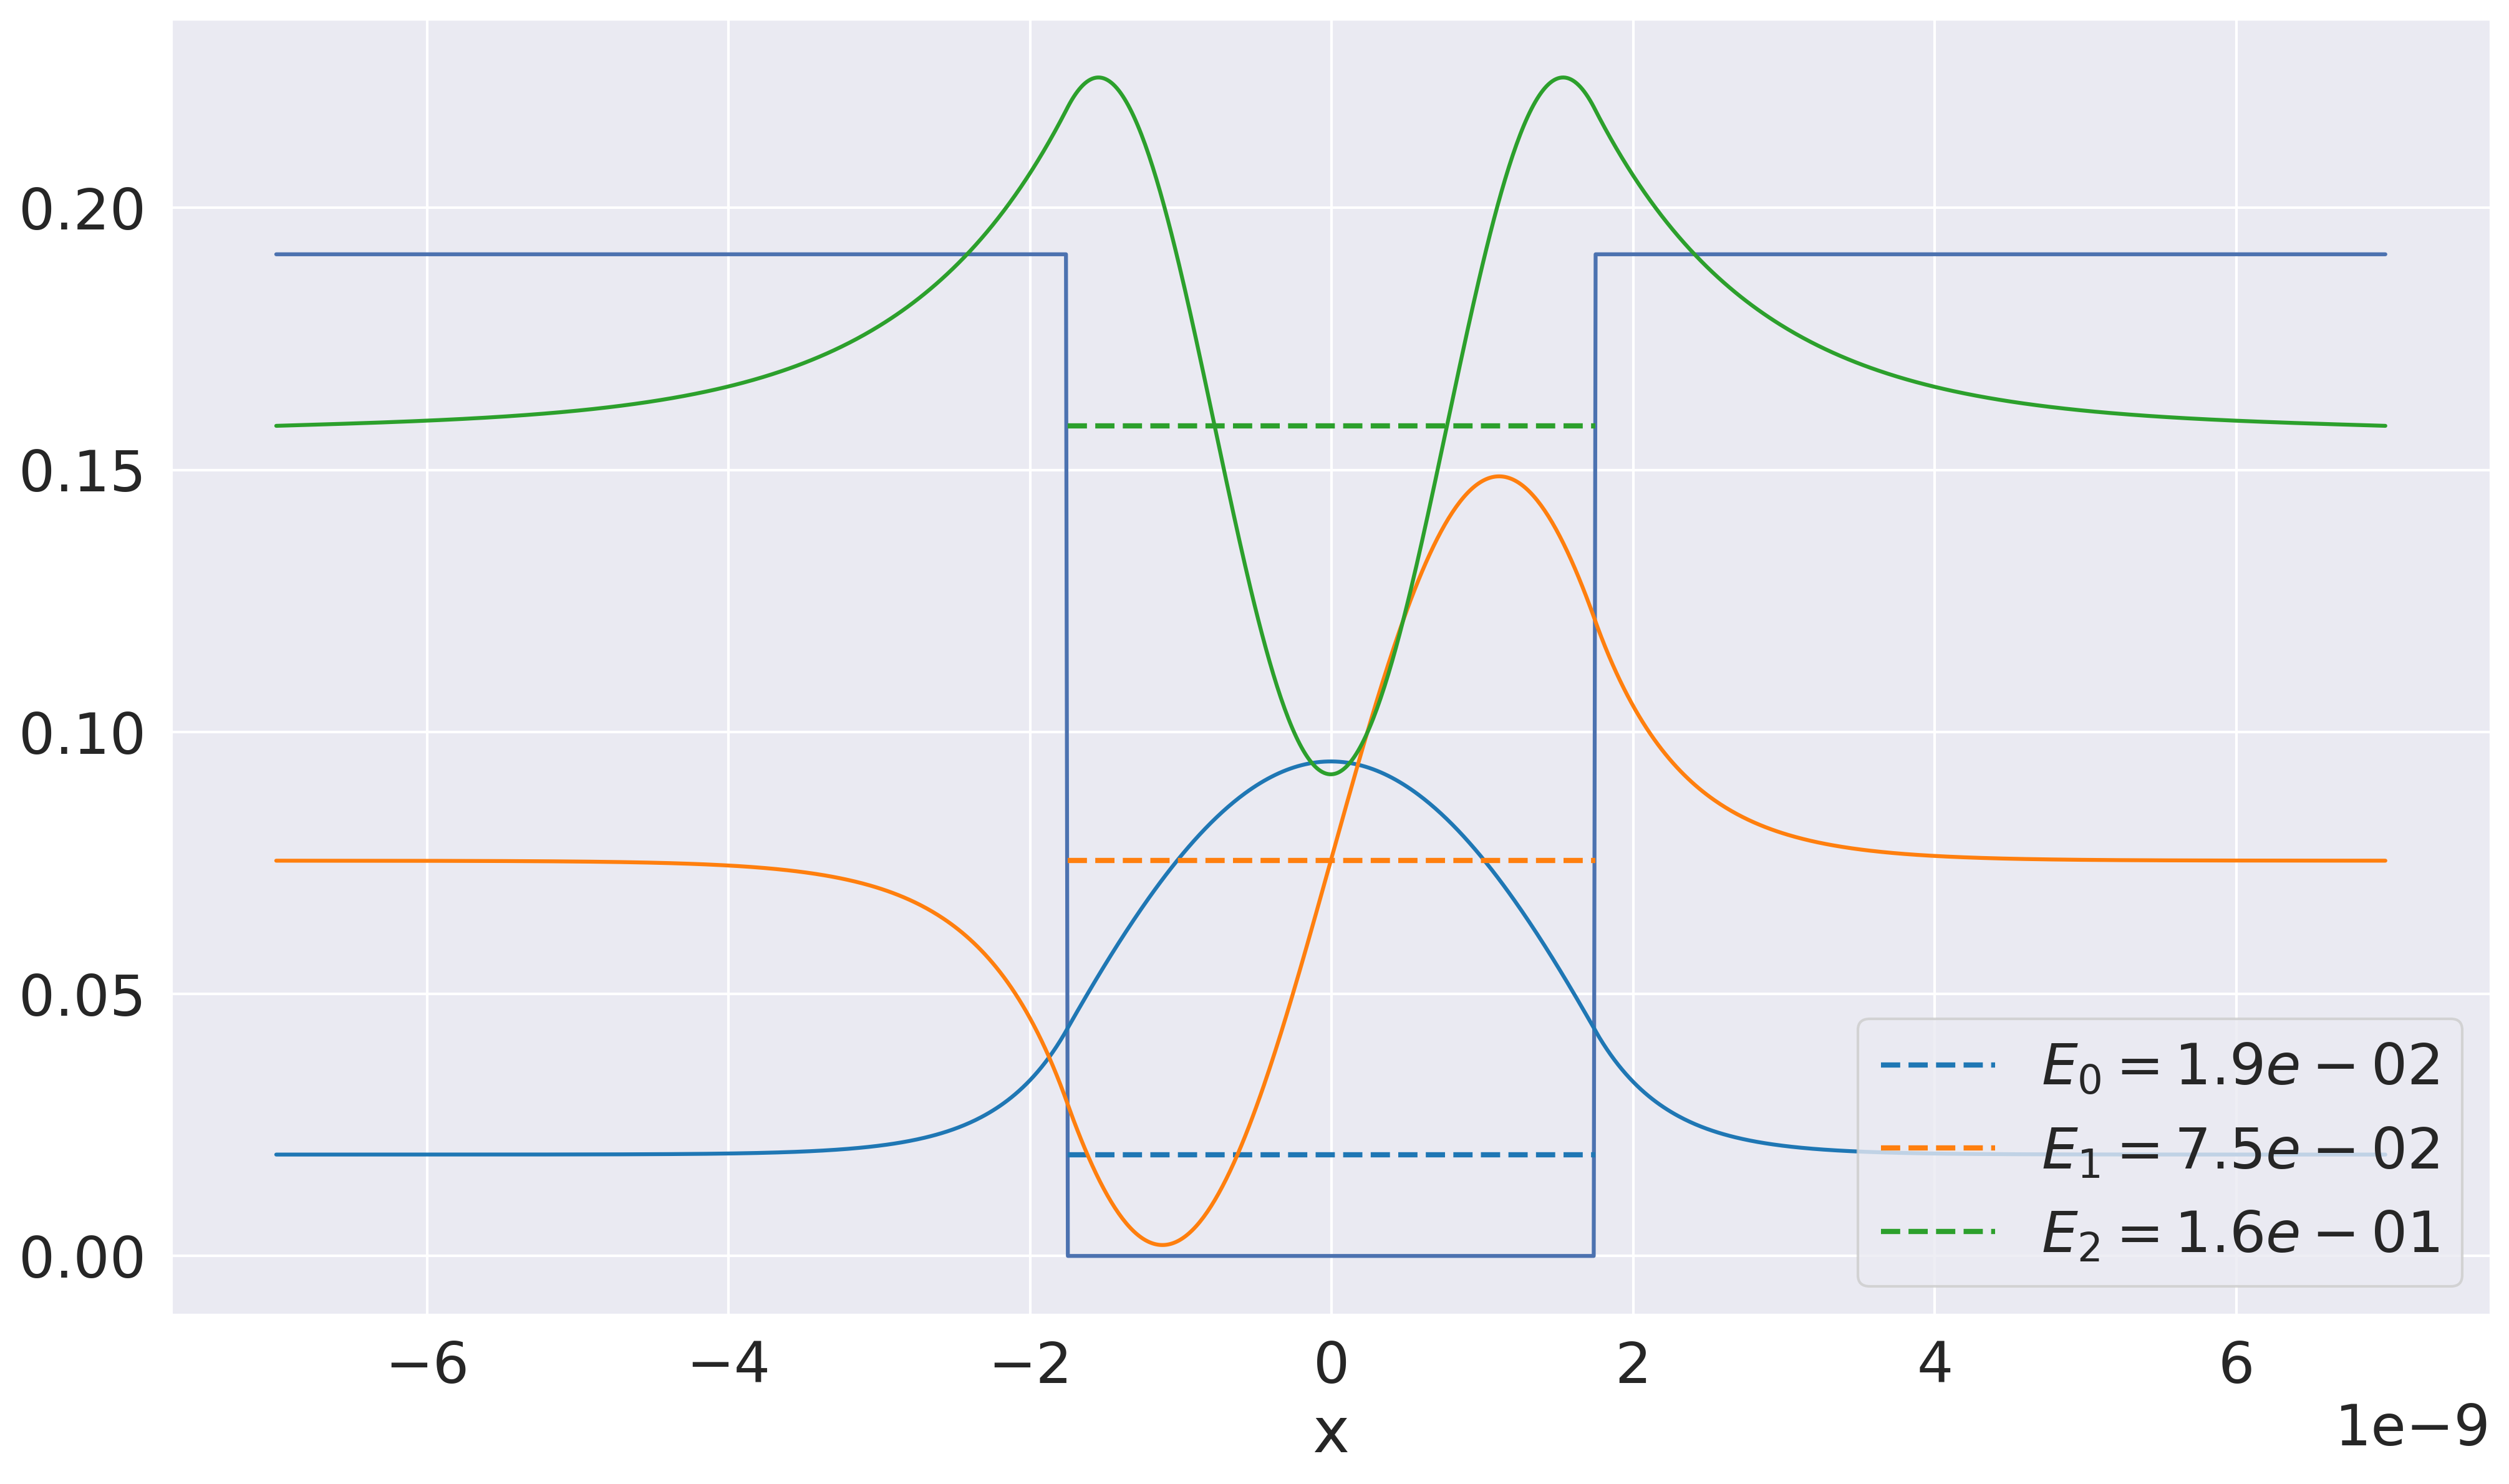

In [46]:
# plota o potencial, as funções de onda e os níveis de energia
fig, ax = plt.subplots(figsize=(16, 9), dpi=300)
ax.plot(xi, Vi)
plt.xlabel("x")

k = -1
cmap = plt.cm.get_cmap("tab10", 10)
for eigen in w:
    k += 1
    if eigen < V0:
        plt.hlines(
            y=eigen,
            xmin=-Lw / 2,
            xmax=Lw / 2,
            lw=2,
            linestyles="dashed",
            label=f"$E_{k}={eigen:.1e}$",
            colors=cmap(k),
        )
        plt.plot(xi, v[:, k] + w[k], color=cmap(k))

plt.legend(loc="lower right")
plt.show()